# $$ \text {Chapter 3 - Drawing a line close to our points: Linear regression} $$

Understanding how the learning rate works :
for an equation $p' = mr + b $, we introduce a learning rate $\eta$ <br> which transforms the equation as 
$m' = m + \eta r(p - p')$ and $b' = b + \eta (p-p')$ until we have achieved convergence.

We get a line with equation $p' = m'r + b'$ that is closer to the point

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import random

matplotlib.rcParams['figure.figsize'] = (13,6)
matplotlib.rcParams['figure.dpi'] = 150

In [34]:
!python -V

Python 3.9.12


In [19]:

import numpy as np
import matplotlib
from matplotlib import pyplot

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('number of rooms')
    pyplot.ylabel('prices')
    

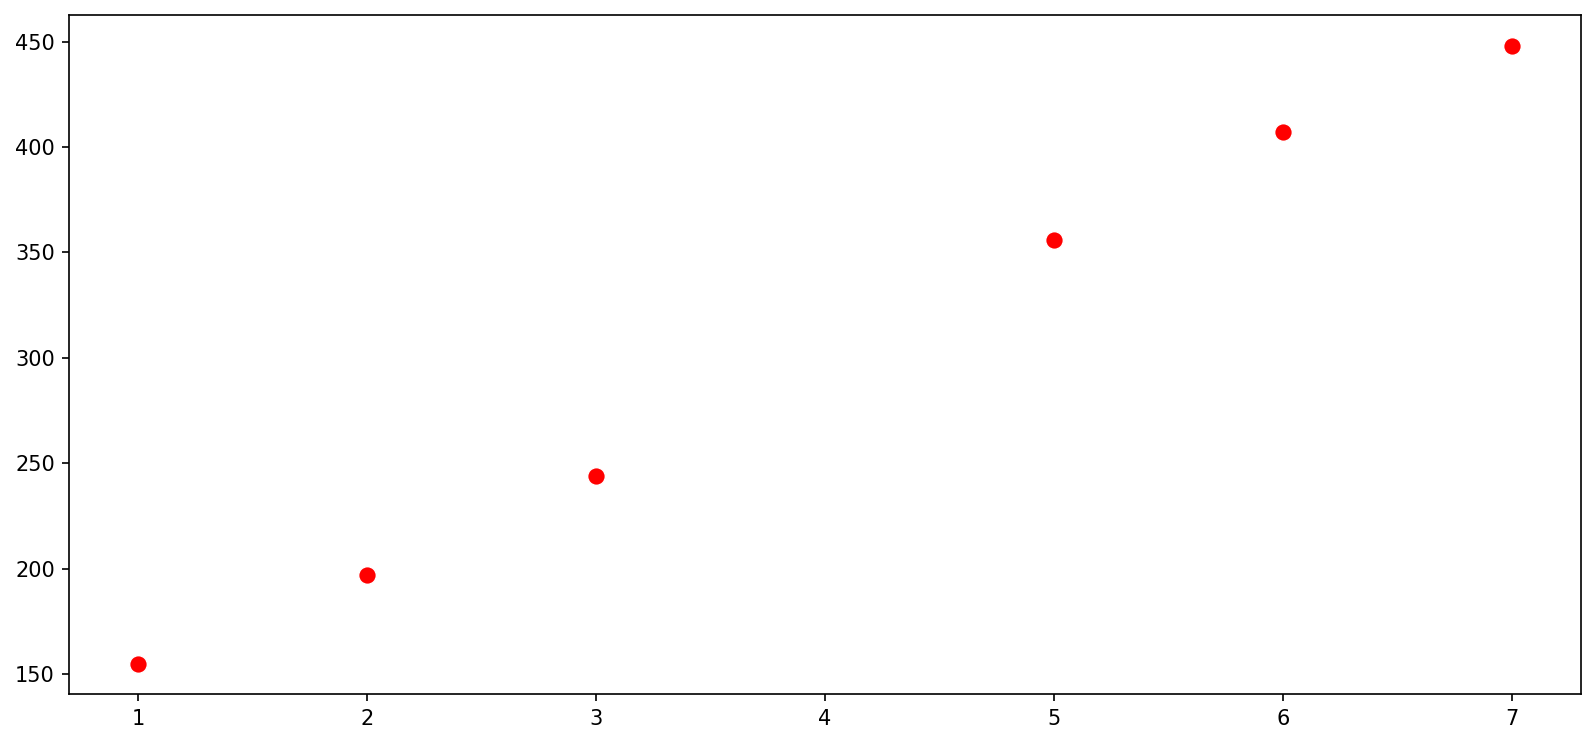

In [20]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

sns.scatterplot(x=features, y=labels, color='red', s = 72);

## Working with error metrics 

In [21]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price



In [22]:
# Convergence happened for the above data
simple_trick(base_price=20000, price_per_room=3000, num_rooms=6, price=12000)

(2999.938897420824, 19999.93570145641)

In [23]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price


In [24]:
absolute_trick(base_price=100, price_per_room=20, num_rooms=6, price=200, learning_rate=0.01)

(19.94, 99.99)

In [25]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

In [26]:
# now the complexity is quite benign here but the accuracy is rather not good here. slope is quite off
square_trick(base_price=100, price_per_room=20, num_rooms=6, price=200, learning_rate=0.01)

(18.8, 99.8)

## Linear Regression

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

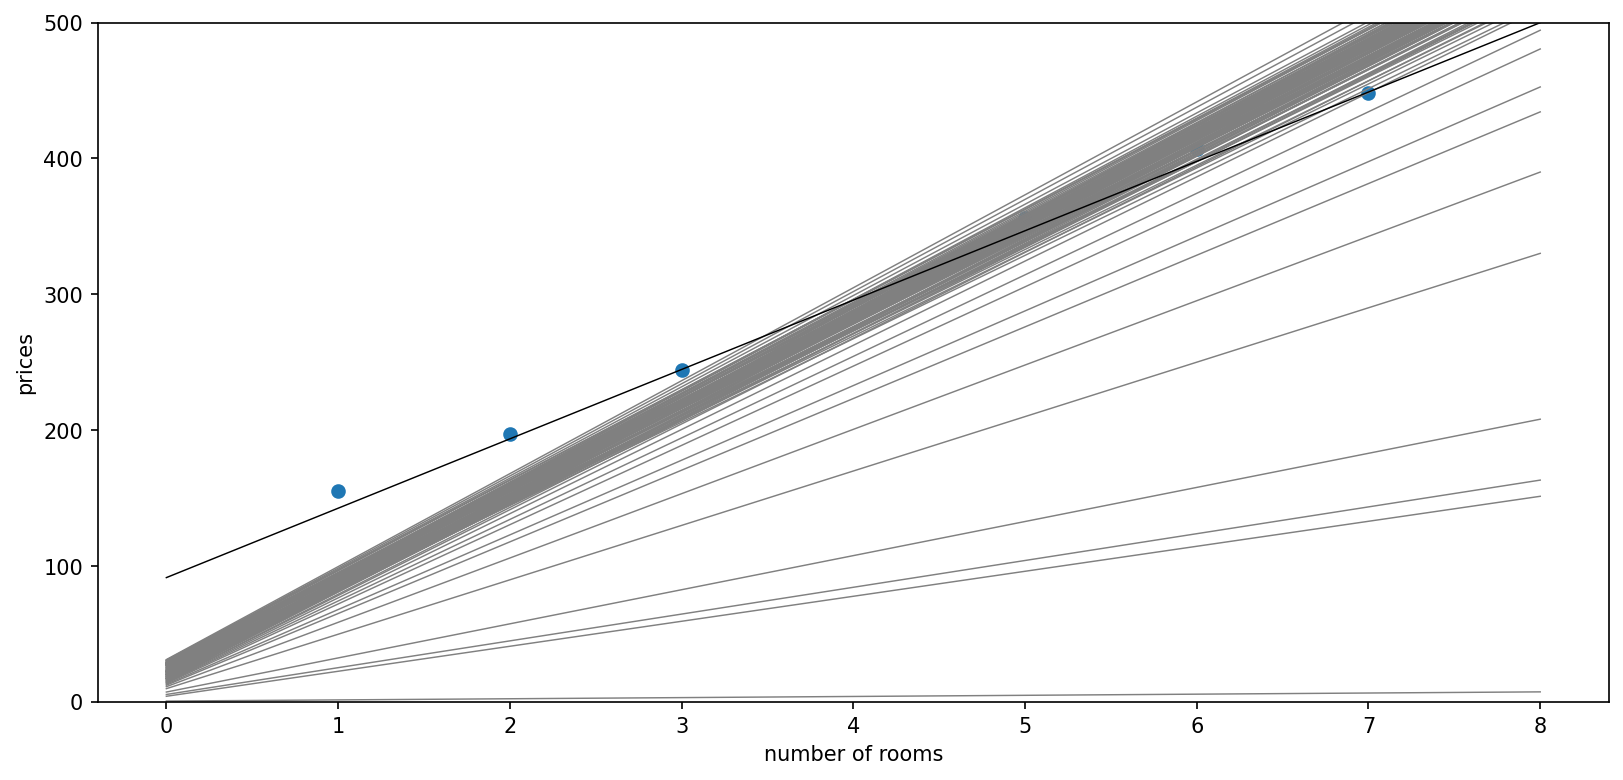

In [27]:
import random
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        if epoch <= 100:
        # if True:
            draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]

        # price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)

    draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)

    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

    Note how the dot prdouct makes it easy to calculate the error metrics like mse, rmse, se etc

In [28]:
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

Price per room: 50.65781332767556
Base price: 99.79504258184782


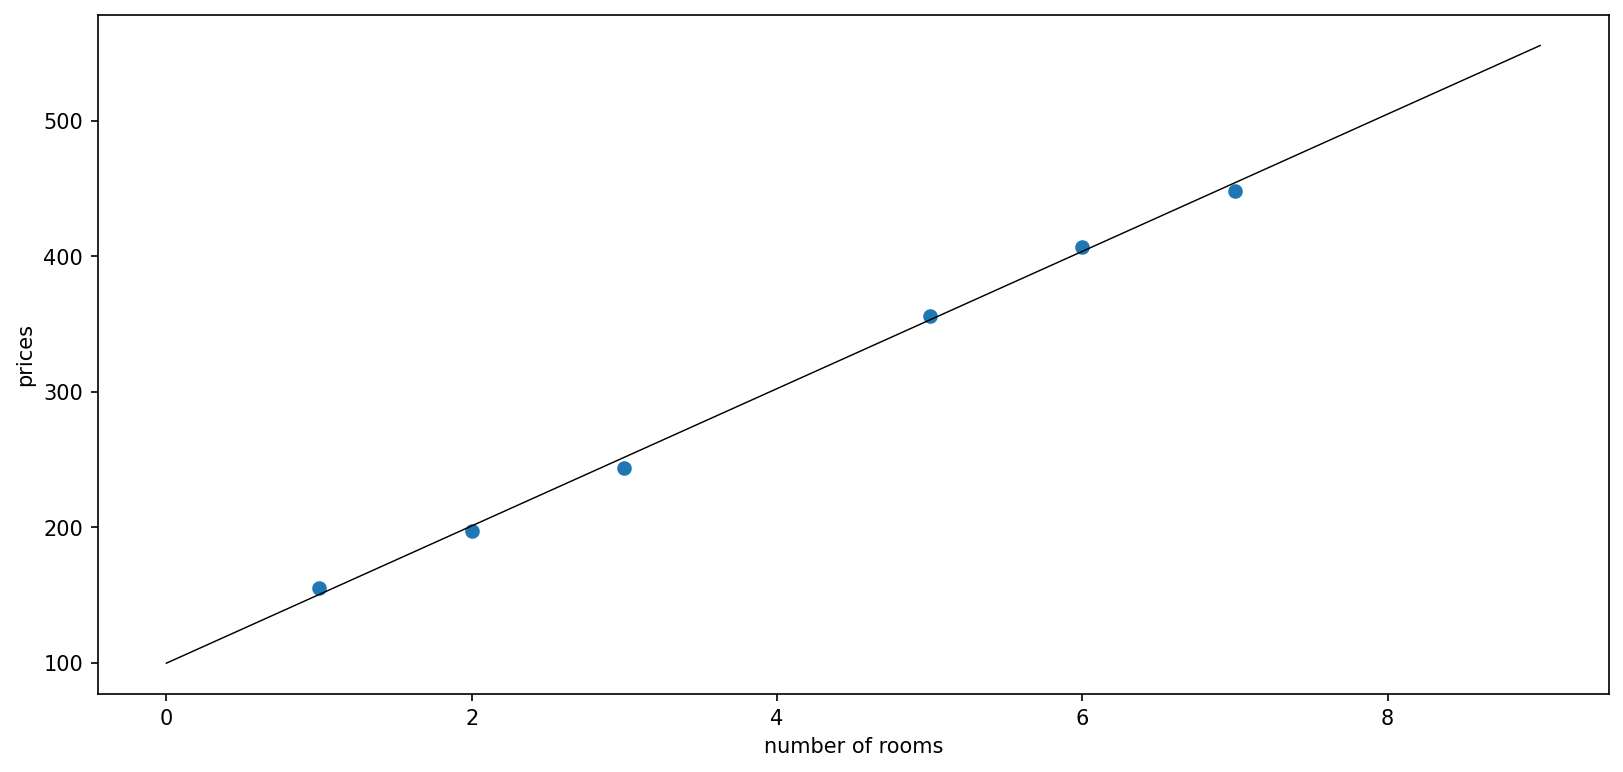

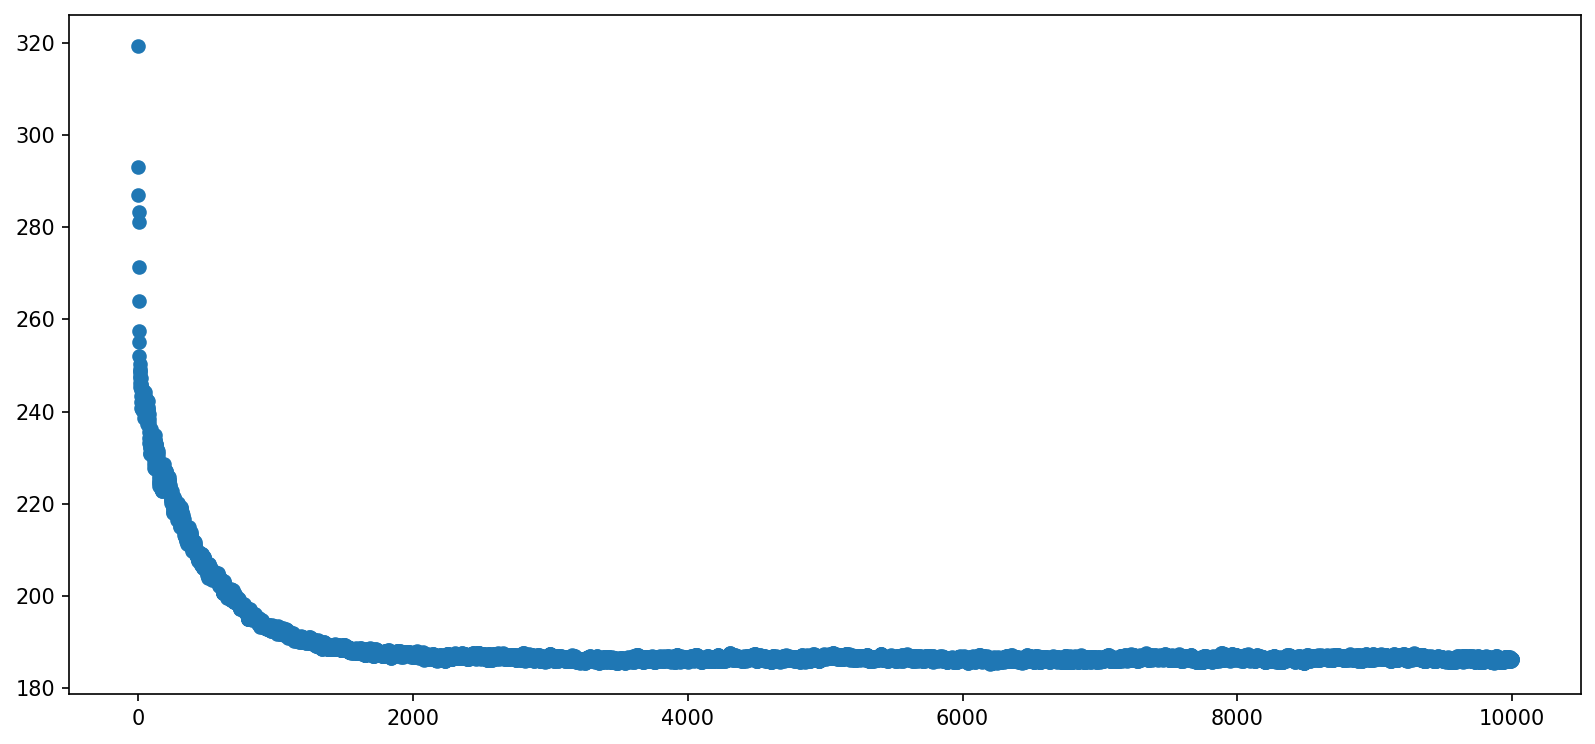

(50.65781332767556, 99.79504258184782)

In [29]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):

    price_per_room = random.random()
    base_price = random.random()
    errors = []

    for i in range(epochs):

        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]

        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,

        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)

    draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)


## Some model 

Notice that the `s` in the SFrame means scalable dataframe. Rest I will learn later

Update from 17th Dec '22 - Turicreate failed to run as it needed python 3.8

In [26]:
import turicreate as tc

datadict = {
    'features': features,
    'labels'  : labels,
}

data = tc.SFrame(datadict)

data

ModuleNotFoundError: No module named 'turicreate'

In [ ]:
type(data)

In [ ]:
model = tc.linear_regression.create(dataset=data, target='labels')

In [ ]:
model.coefficients

## making a prediction now 

In [ ]:
house = tc.SFrame({
    'Area' : [1000],
    'No. of Bedrooms' : [3]
})

model.predict(house)

# $ \text{Housing Data Set} $

In [ ]:
housing = tc.SFrame('Hyderabad.csv')
housing.shape

###   <font color = 'aqua'> $ \text{let's explore the data } $ 

In [ ]:
sns.scatterplot(x=housing['Area'], y=housing['Price']);
sns.regplot(x=housing['Area'], y=housing['Price'], color='teal');

In [ ]:
housing.__get_column_description__

In [ ]:
model_hyderabad = tc.linear_regression.create(dataset=housing,features=['Area'], target='Price')

In [ ]:
model_hyderabad.coefficients

In [ ]:
b, m = model_hyderabad.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

### $ \text{but building a model that uses all the features is obviously better choice  } $

In [ ]:
model_hyd_2 = tc.linear_regression.create(dataset=housing, target='Price')

In [ ]:
new_houses = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
new_houses

In [ ]:
print(model_hyderabad.predict(new_houses))
print('-' * 40)
print(model_hyd_2.predict(new_houses))

In [ ]:
model_hyderabad._get_summary_struct

In [ ]:
model_hyd_2.coefficients

In [ ]:
model_hyd_2.evaluate(dataset=housing)

# $$ \text{Exercises} $$

In [ ]:
import turicreate as tc
import pandas as pd

In [ ]:
df_pd = pd.DataFrame({'size':[100,200,200,250,325],
               'price':[200,475,400,520,735]},
                 index = ['house 1','house 2','house 3','house 4','house 5'])

df_pd

In [ ]:
df_tc = tc.SFrame(data= df_pd)
df_tc

In [ ]:
model = tc.linear_regression.create(dataset=df_tc, features= ['size'], target='price')
model